## Introducción a PyTorch (Parte 5)

En este notebook vamos a utilizar los conocimientos aprendidos en los notebooks anteriores para realizar un entrenamiento más avanzando. En particular aprenderemos lo siguiente:
- Carga de un dataset.
- Particionado de los datos.
- Creación de los DataLoaders.
- Bucle de entrenamiento, validación y early stopping.
- Salvar el modelo y checkpoints intermedios. Carga de modelos.
- Inferencia.

Trabajaremos en este caso con el conjunto FashionMNIST, un conjunto con **10 clases**, 60.000 ejemplos de entrenamiento y 10.000 ejemplos para test.

### Carga de los datos
Procederemos igual que en la práctica anterior:

In [3]:
import torch
from torch.utils.data import Dataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(root="data",train=True,download=True,transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

print("Datos de entrenamiento:")
print(training_data, end='\n\n')
print("Datos de test:")
print(test_data, end='\n\n')

# Separación de un conjunto de validación
training_data, validation_data = random_split(training_data,(50000,10000))

Datos de entrenamiento:
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Datos de test:
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()



### Visualización de los datos

Visualizamos algunos datos para ver como son las imágenes:

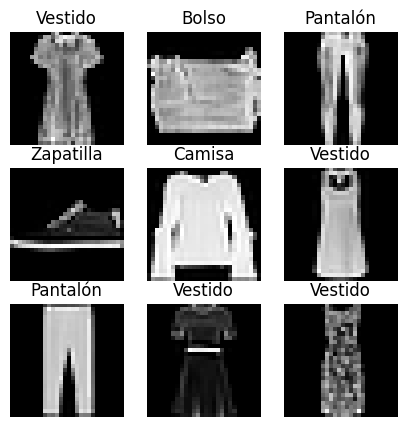

In [10]:
labels_map = {
    0: "Camiseta",
    1: "Pantalón",
    2: "Jersey",
    3: "Vestido",
    4: "Abrigo",
    5: "Sandalia",
    6: "Camisa",
    7: "Zapatilla",
    8: "Bolso",
    9: "Bota",
}

figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creación de los DataLoaders

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, num_workers=2)
val_dataloader = DataLoader(validation_data, batch_size=64, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2)